In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/amogh/OneDrive/Desktop/College Life/Summer Break 1 Projects/Credit_Card_Churn/data/BankChurners.csv')

In [3]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [4]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
df.drop(columns=['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],inplace=True)

In [6]:
df.shape

(10127, 20)

In [7]:
for col in df:
  print(col,df[col].unique())

Attrition_Flag ['Existing Customer' 'Attrited Customer']
Customer_Age [45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27]
Gender ['M' 'F']
Dependent_count [3 5 4 2 0 1]
Education_Level ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category ['Blue' 'Gold' 'Silver' 'Platinum']
Months_on_book [39 44 36 34 21 46 27 31 54 30 48 37 56 42 49 33 28 38 41 43 45 52 40 50
 35 47 32 20 29 25 53 24 55 23 22 26 13 51 19 15 17 18 16 14]
Total_Relationship_Count [5 6 4 3 2 1]
Months_Inactive_12_mon [1 4 2 3 6 0 5]
Contacts_Count_12_mon [3 2 0 1 4 5 6]
Credit_Limit [12691.  8256.  3418. ...  5409.  5281. 10388.]
Total_Revolving_Bal [ 777  864    0 ...  534  476 2241]
Avg_Open_To_Buy [11914.  7392.  3418. ... 11831.  5

In [8]:
mask = (df['Marital_Status'] == 'Unknown') | (df['Education_Level'] == 'Unknown') | (df['Income_Category'] == 'Unknown')
df1 = df[~mask]

# Using data for EDA

In [9]:
Categoricals = ['Attrition_Flag','Gender','Education_Level',
                'Marital_Status','Income_Category',
                'Card_Category','Dependent_count',
           'Total_Relationship_Count','Months_Inactive_12_mon',
           'Contacts_Count_12_mon']
Numeric = ['Customer_Age','Credit_Limit','Months_on_book']
Features = ['Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
        'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Revolving_Bal',
        'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
len(Categoricals) + len(Numeric) + len(Features)

20

## Customer Demographics

1. Dataset is imbalanced cuz too low attrited customers
2. Rest all categoricals have no anomalies
3. Distribution of Months_on_book is imbalanced cuz most people came in a 36 months gap
4. People's number of relationship with bank is left skewed that's a good thing
5. Distribution of inactive months is right skewed indicating possible future problems
6. But contacts made with bank in past is normal enough
7. Credit limit is right skewed that's understandable cuz most people in low level cards
8. Revolving Balance is well distibuted no issues here, there is a natural initial high spike cuz low income group is really big and they avoid credit.
9. Avg_open to buy is understandably similar to credit limit
10. Total_Amt_Chng_Q4_Q1 is right skewed , it's bad cuz people spending less
11. Total_tran_amt is like card category, cuz low level card low credit limit lesser spending on it
12. Total_Ct_chng_Q4_Q1 is <1 not good
13. Avg utlization is low pretty bad higly right skewed.

In [10]:
for col in df1:
  if col in Categoricals:
    print(col,df1[col].value_counts())

Attrition_Flag Attrition_Flag
Existing Customer    5968
Attrited Customer    1113
Name: count, dtype: int64
Gender Gender
M    3706
F    3375
Name: count, dtype: int64
Dependent_count Dependent_count
3    1929
2    1880
1    1274
4    1077
0     636
5     285
Name: count, dtype: int64
Education_Level Education_Level
Graduate         2591
High School      1653
Uneducated       1204
College           844
Post-Graduate     431
Doctorate         358
Name: count, dtype: int64
Marital_Status Marital_Status
Married     3564
Single      2948
Divorced     569
Name: count, dtype: int64
Income_Category Income_Category
Less than $40K    2792
$40K - $60K       1412
$80K - $120K      1202
$60K - $80K       1103
$120K +            572
Name: count, dtype: int64
Card_Category Card_Category
Blue        6598
Silver       391
Gold          81
Platinum      11
Name: count, dtype: int64
Total_Relationship_Count Total_Relationship_Count
3    1617
5    1363
4    1350
6    1276
2     848
1     627
Name: count,

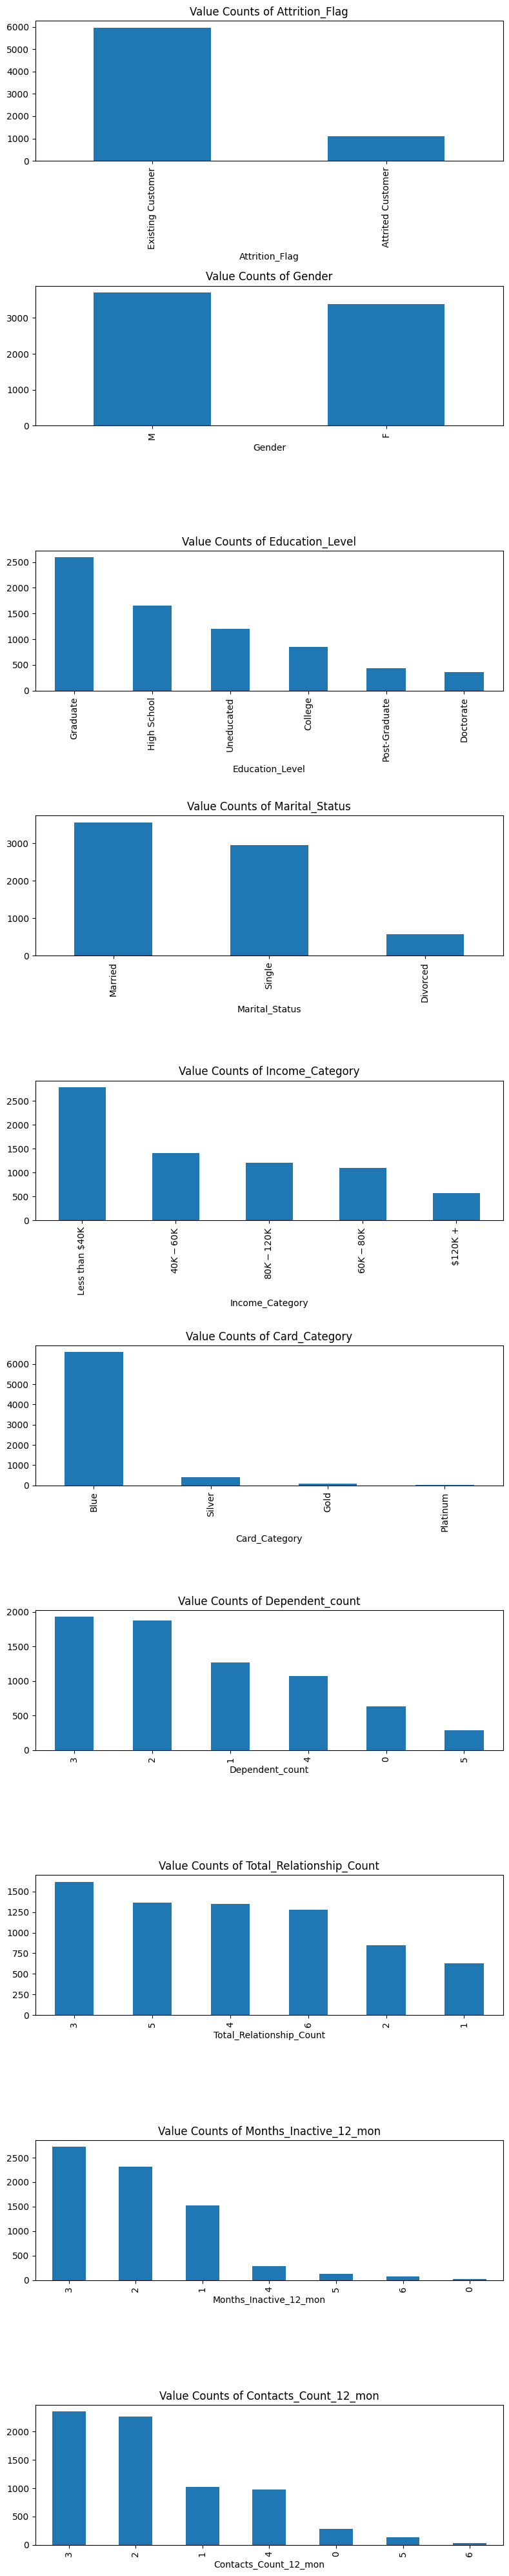

In [11]:
fig, axes = plt.subplots(nrows=len(Categoricals), ncols=1, figsize=(8, 4*len(Categoricals)))

for i, col in enumerate(Categoricals):
    df1[col].value_counts().plot.bar(ax=axes[i])
    axes[i].set_title(f'Value Counts of {col}')

plt.tight_layout()
plt.show()
# Dataset is imbalanced cuz too low attrited customers
# Rest all categoricals have no anomalies

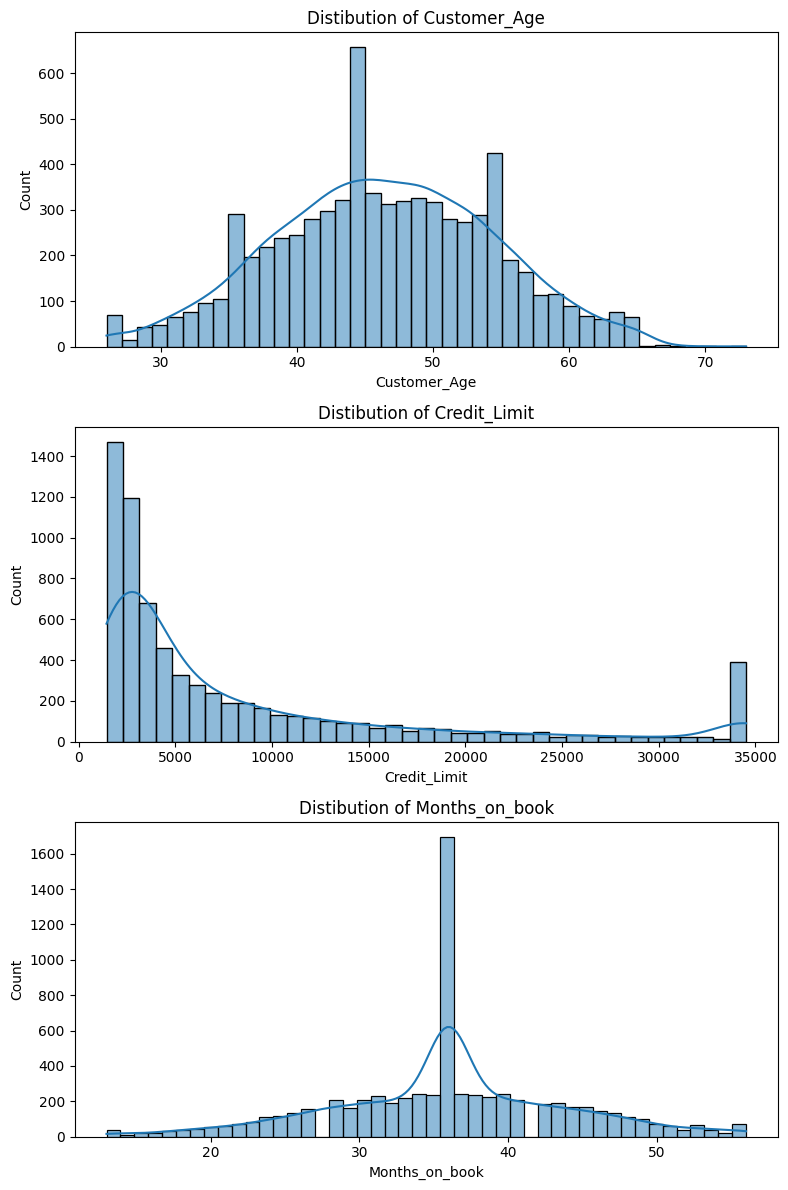

In [12]:
fig, axes = plt.subplots(nrows=len(Numeric), ncols=1, figsize=(8, 4*len(Numeric)))

for i, col in enumerate(Numeric):
    sns.histplot(df1[col], ax=axes[i],kde=True)
    axes[i].set_title(f'Distibution of {col}')

plt.tight_layout()
plt.show()
# Distribution of Months_on_book is imbalanced cuz most people came in a 36 months gap
# People's number of relationship with bank is left skewed that's a good thing
# Distribution of inactive months is right skewed indicating possible future problems
# But contacts made with bank in past is normal enough
# Credit limit is right skewed that's understandable cuz most people in low level cards
# Revolving Balance is well distibuted no issues here, there is a natural initial high spike cuz low income group is really big and they avoid credit.

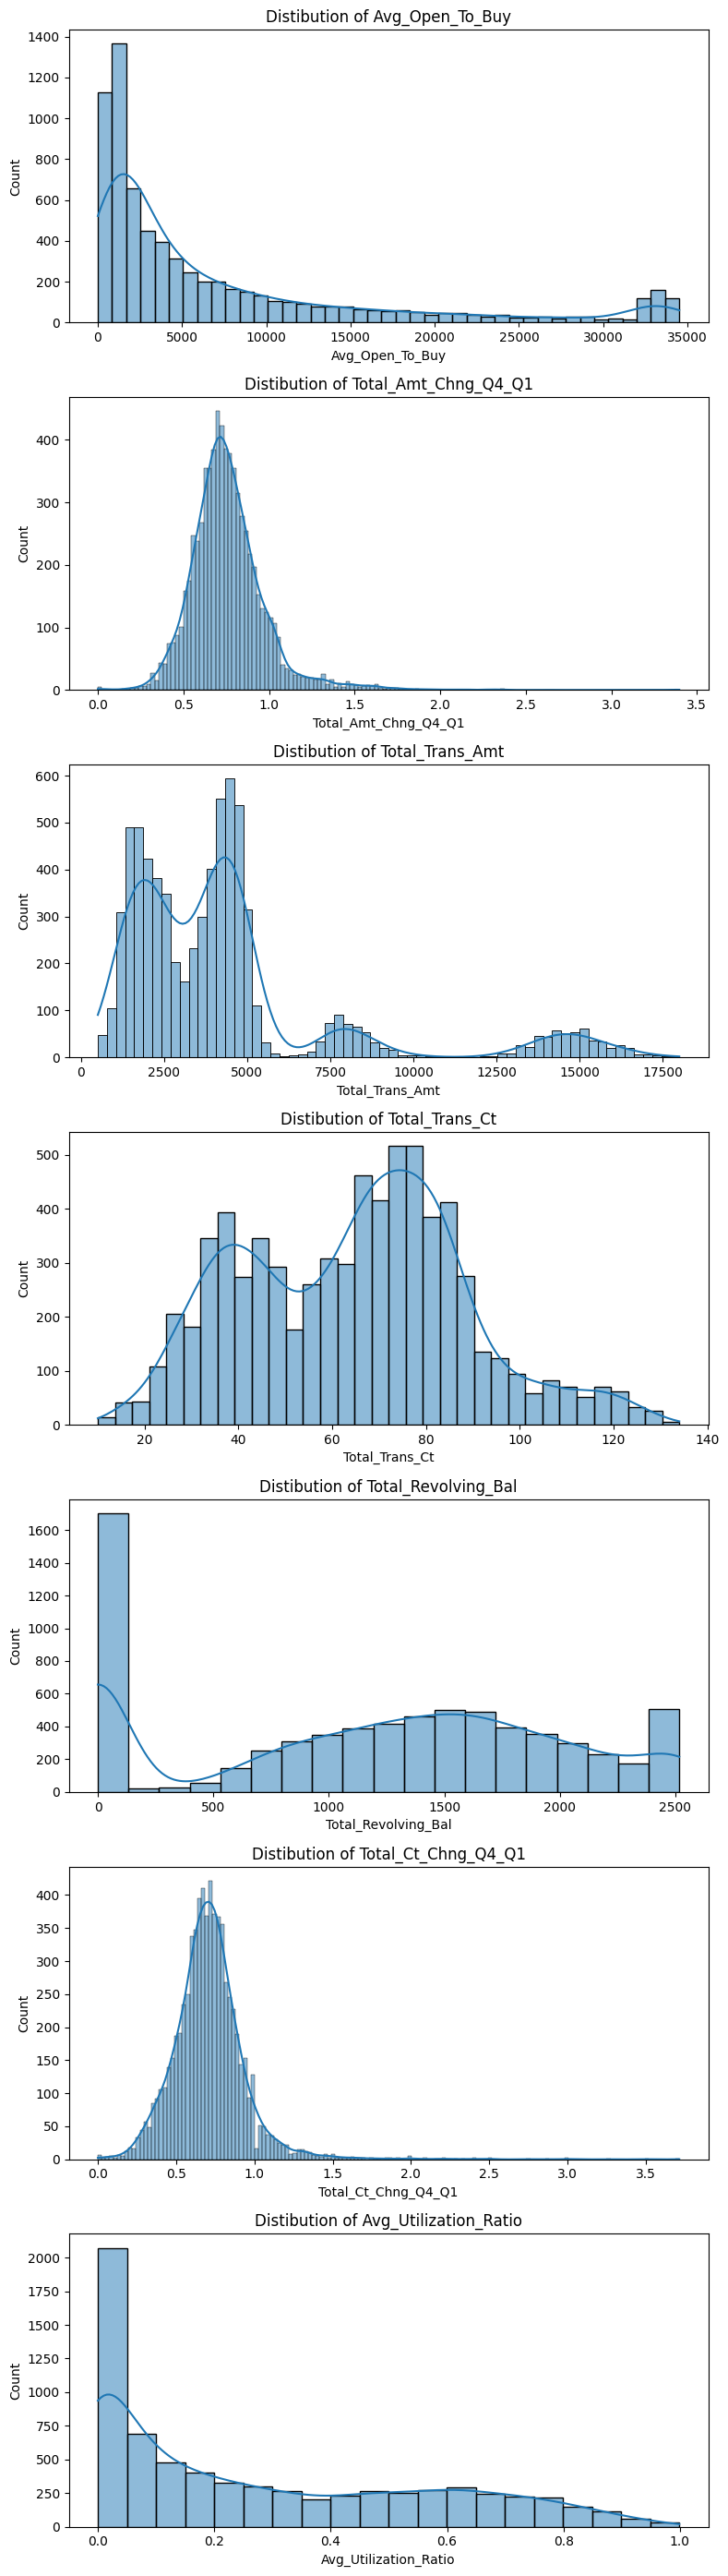

In [13]:
fig, axes = plt.subplots(nrows=len(Features), ncols=1, figsize=(8, 4*len(Features)))

for i, col in enumerate(Features):
    sns.histplot(df1[col], ax=axes[i],kde=True)
    axes[i].set_title(f'Distibution of {col}')

plt.tight_layout()
plt.show()
# Avg_open to buy is understandably similar to credit limit
# Total_Amt_Chng_Q4_Q1 is right skewed , it's bad cuz people spending less
# Total_tran_amt is like card category, cuz low level card low credit limit lesser spending on it
# Total_Ct_chng_Q4_Q1 is <1 not good
# Avg utlization is low pretty bad higly right skewed.

## Demographics <--> Attrition Relation

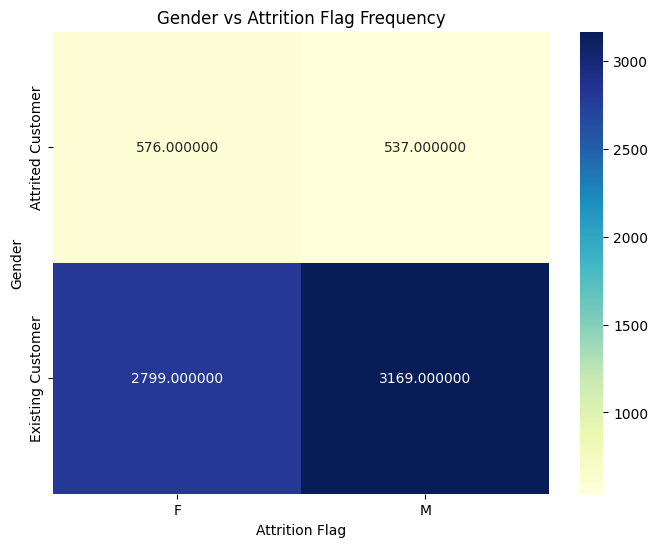

In [14]:
d = df1[['Gender','Attrition_Flag']]
ct = pd.crosstab(columns=d['Gender'], index=d['Attrition_Flag'])
# ct['Percentage_Attrited'] = ct['Attrited Customer'] / (ct['Attrited Customer'] + ct['Existing Customer']) * 100

plt.figure(figsize=(8, 6))
sns.heatmap(ct, annot=True, fmt='f', cmap='YlGnBu')  # 'YlGnBu' is a good colormap for frequency
plt.title('Gender vs Attrition Flag Frequency')
plt.ylabel('Gender')
plt.xlabel('Attrition Flag')
plt.show()

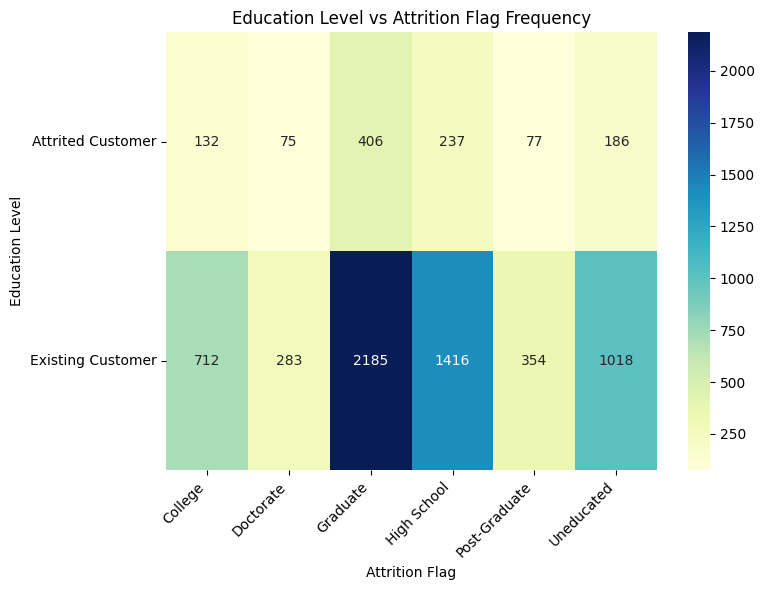

In [15]:
d1 = df1[['Education_Level','Attrition_Flag']]
ct1 = pd.crosstab(columns=d1['Education_Level'], index=d1['Attrition_Flag'])
plt.figure(figsize=(8, 6))
sns.heatmap(ct1, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Education Level vs Attrition Flag Frequency')
plt.ylabel('Education Level')
plt.xlabel('Attrition Flag')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [16]:
ct1_swapped = ct1.T
ct1_swapped['Percentage_Attrited'] = ct1_swapped['Attrited Customer'] / (ct1_swapped['Attrited Customer'] + ct1_swapped['Existing Customer']) * 100
ct1_swapped

Attrition_Flag,Attrited Customer,Existing Customer,Percentage_Attrited
Education_Level,,,
College,132,712,15.639810
Doctorate,75,283,20.949721
Graduate,406,2185,15.669626
High School,237,1416,14.337568
Post-Graduate,77,354,17.865429
Uneducated,186,1018,15.448505


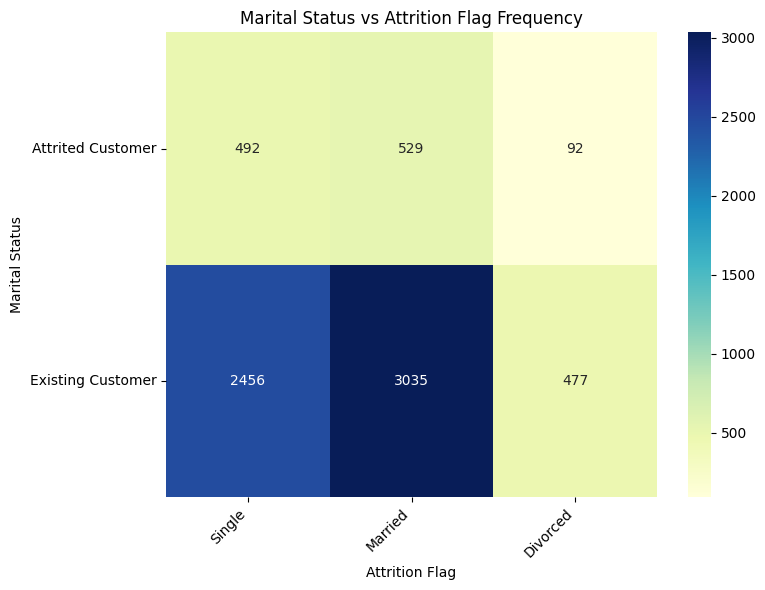

Attrition_Flag,Attrited Customer,Existing Customer,Percentage_Attrited
Marital_Status,,,
Single,492,2456,16.689281
Married,529,3035,14.842873
Divorced,92,477,16.168717


In [17]:
d3 = df1[['Marital_Status','Attrition_Flag']]
ct3 = pd.crosstab(columns=d3['Marital_Status'], index=d3['Attrition_Flag'])
ct3 = ct3[['Single','Married','Divorced']]
plt.figure(figsize=(8, 6))
sns.heatmap(ct3, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Marital Status vs Attrition Flag Frequency')
plt.ylabel('Marital Status')
plt.xlabel('Attrition Flag')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
ct3_swapped = ct3.T
ct3_swapped['Percentage_Attrited'] = ct3_swapped['Attrited Customer'] / (ct3_swapped['Attrited Customer'] + ct3_swapped['Existing Customer']) * 100
ct3_swapped

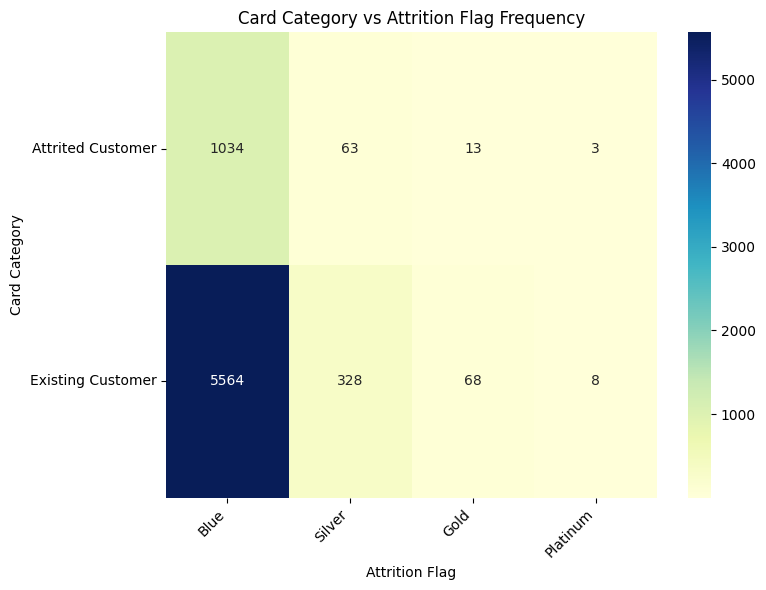

Attrition_Flag,Attrited Customer,Existing Customer,Percentage_Attrited
Card_Category,,,
Blue,1034,5564,15.671416
Silver,63,328,16.112532
Gold,13,68,16.049383
Platinum,3,8,27.272727


In [18]:
d4 = df1[['Card_Category','Attrition_Flag']]
ct4 = pd.crosstab(columns=d4['Card_Category'], index=d4['Attrition_Flag'])
ct4 = ct4[['Blue','Silver','Gold','Platinum']]
plt.figure(figsize=(8, 6))
sns.heatmap(ct4, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Card Category vs Attrition Flag Frequency')
plt.ylabel('Card Category')
plt.xlabel('Attrition Flag')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
ct4_swapped = ct4.T
ct4_swapped['Percentage_Attrited'] = ct4_swapped['Attrited Customer'] / (ct4_swapped['Attrited Customer'] + ct4_swapped['Existing Customer']) * 100
ct4_swapped

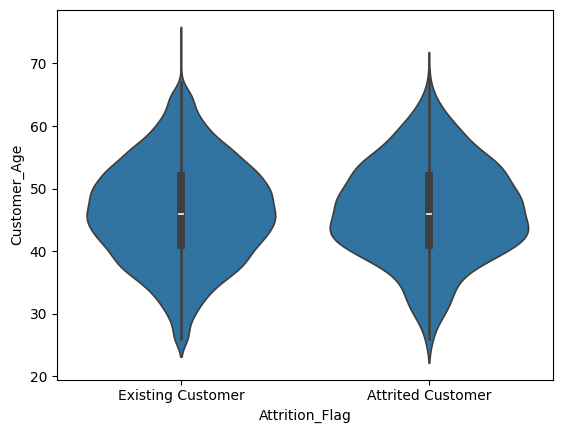

In [19]:
sns.violinplot(data=df1, x='Attrition_Flag', y='Customer_Age')
plt.xlabel('Attrition_Flag')
plt.ylabel('Customer_Age')
plt.show()

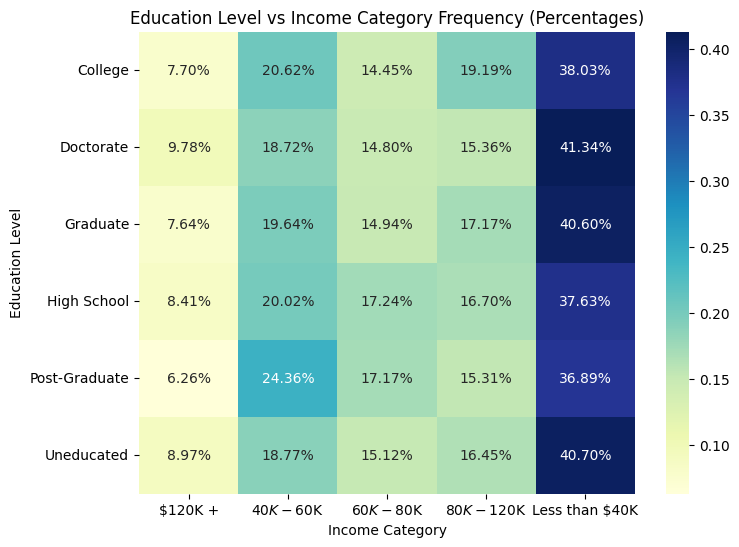

In [20]:
d = df1[['Education_Level','Income_Category']]
ct = pd.crosstab(index=d['Education_Level'], columns=d['Income_Category'])

ct_percent = ct.div(ct.sum(axis=1), axis=0)
plt.figure(figsize=(8, 6))
sns.heatmap(ct_percent, annot=True, fmt='.2%', cmap='YlGnBu')
plt.title('Education Level vs Income Category Frequency (Percentages)')
plt.ylabel('Education Level')
plt.xlabel('Income Category')
plt.show()

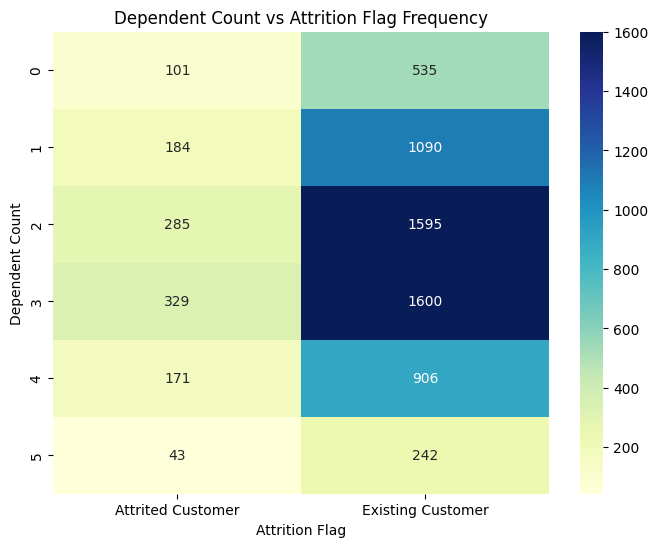

In [21]:
ct = pd.crosstab(index=df1['Dependent_count'], columns=df1['Attrition_Flag'])

plt.figure(figsize=(8, 6))
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Dependent Count vs Attrition Flag Frequency')
plt.ylabel('Dependent Count')
plt.xlabel('Attrition Flag')
plt.show()

Dependent_count ↔ Total_Trans_Amt ,
Attrition_Flag

More dependents may mean higher spending and usage, possibly reducing attrition.

Well it doesn't

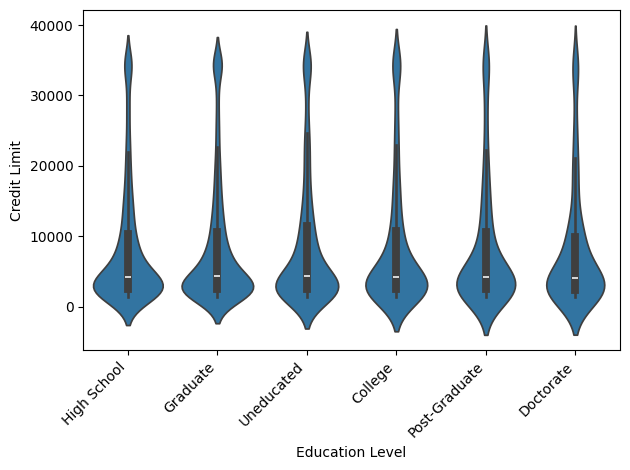

In [22]:
sns.violinplot(data=df1, x='Education_Level', y='Credit_Limit')
plt.xlabel('Education Level')
plt.ylabel('Credit Limit')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

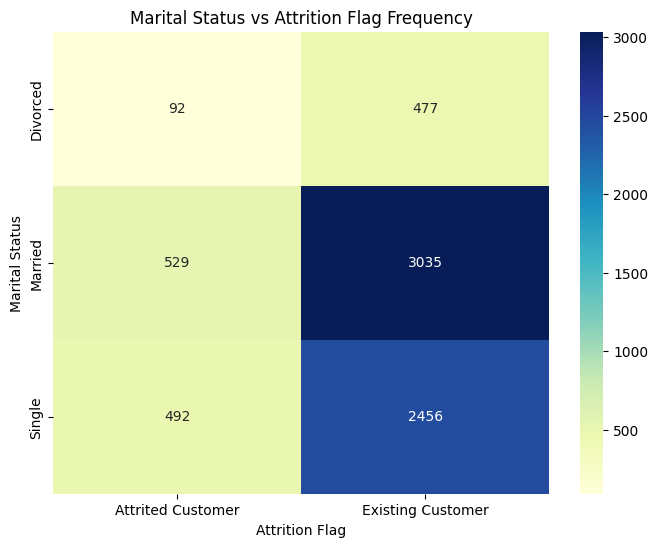

In [23]:
ct = pd.crosstab(index=df1['Marital_Status'], columns=df1['Attrition_Flag'])

plt.figure(figsize=(8, 6))
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Marital Status vs Attrition Flag Frequency')
plt.ylabel('Marital Status')
plt.xlabel('Attrition Flag')
plt.show()


## Card Details relation to Loyalty

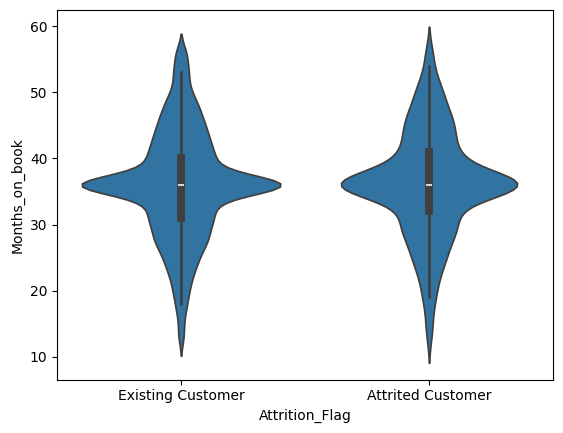

In [24]:
sns.violinplot(data=df1, x='Attrition_Flag', y='Months_on_book')
plt.xlabel('Attrition_Flag')
plt.ylabel('Months_on_book')
plt.show()

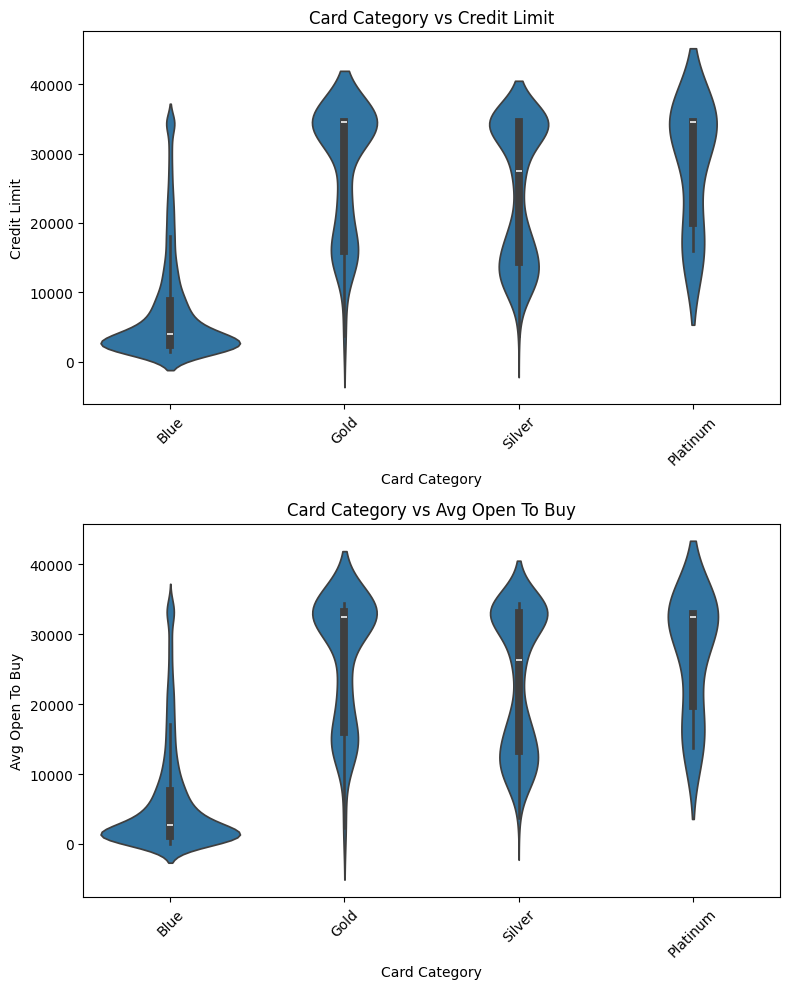

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

sns.violinplot(data=df1, x='Card_Category', y='Credit_Limit', ax=axes[0])
axes[0].set_title('Card Category vs Credit Limit')
axes[0].set_xlabel('Card Category')
axes[0].set_ylabel('Credit Limit')
axes[0].tick_params(axis='x', rotation=45)


sns.violinplot(data=df1, x='Card_Category', y='Avg_Open_To_Buy', ax=axes[1])
axes[1].set_title('Card Category vs Avg Open To Buy')
axes[1].set_xlabel('Card Category')
axes[1].set_ylabel('Avg Open To Buy')
axes[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

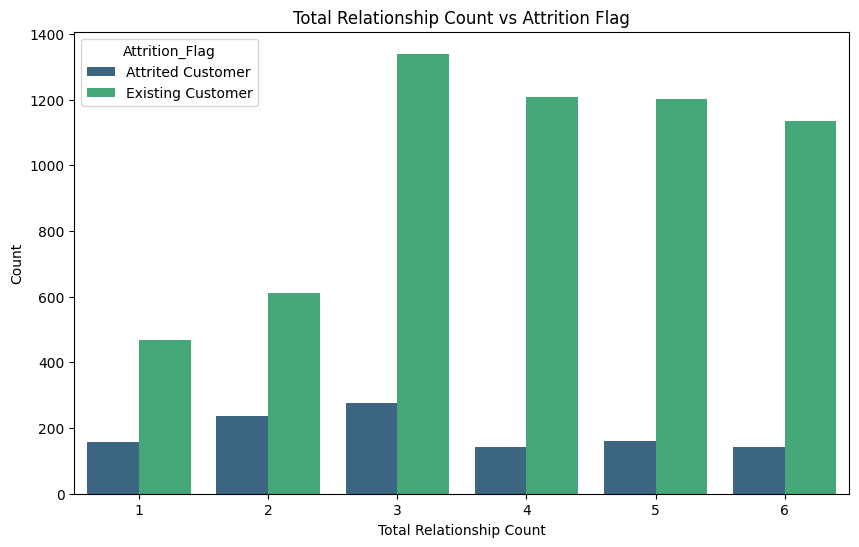

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='Total_Relationship_Count', hue='Attrition_Flag', palette='viridis')
plt.title('Total Relationship Count vs Attrition Flag')
plt.xlabel('Total Relationship Count')
plt.ylabel('Count')
plt.show()

## Account Activity ↔ Engagement

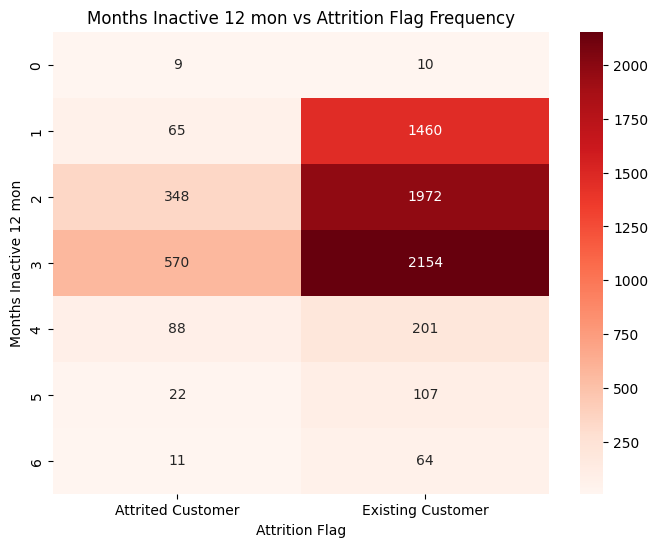

In [27]:
# prompt: Months_Inactive_12_mon ↔ Attrition_Flag make cross tab then color
# change colors higher number is reddish

ct = pd.crosstab(index=df1['Months_Inactive_12_mon'], columns=df1['Attrition_Flag'])

plt.figure(figsize=(8, 6))
sns.heatmap(ct, annot=True, fmt='d', cmap='Reds')
plt.title('Months Inactive 12 mon vs Attrition Flag Frequency')
plt.ylabel('Months Inactive 12 mon')
plt.xlabel('Attrition Flag')
plt.show()

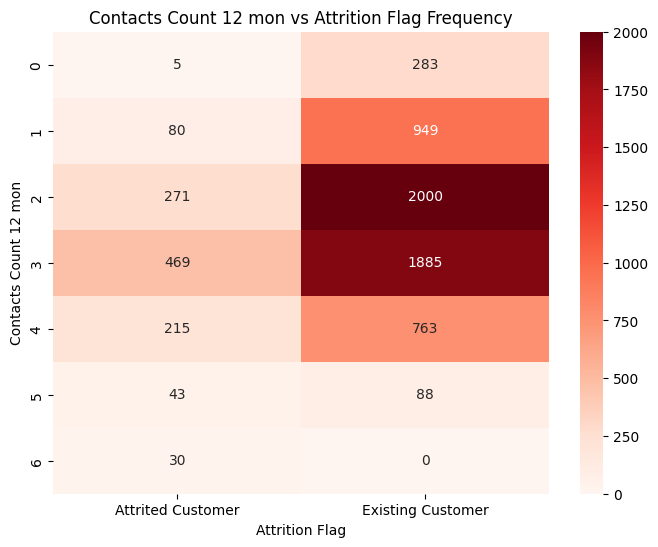

In [28]:
ct = pd.crosstab(index=df1['Contacts_Count_12_mon'], columns=df1['Attrition_Flag'])

plt.figure(figsize=(8, 6))
sns.heatmap(ct, annot=True, fmt='d', cmap='Reds')
plt.title('Contacts Count 12 mon vs Attrition Flag Frequency')
plt.ylabel('Contacts Count 12 mon')
plt.xlabel('Attrition Flag')
plt.show()

<Axes: xlabel='Attrition_Flag', ylabel='Total_Trans_Ct'>

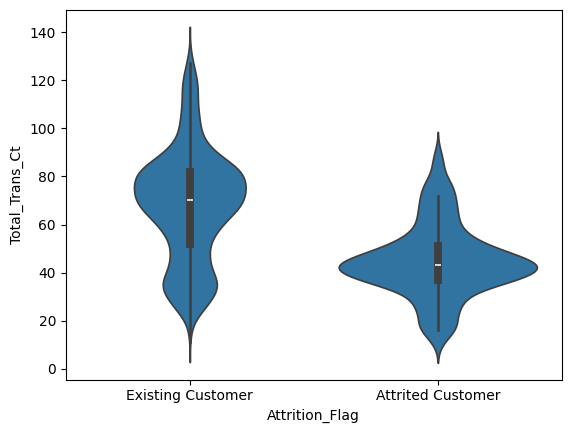

In [29]:
sns.violinplot(data=df1, x='Attrition_Flag', y='Total_Trans_Ct')